In [202]:
!gdown --id 1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8
To: /content/sales_prediction.csv
100% 870k/870k [00:00<00:00, 11.7MB/s]


In [203]:
import pandas as pd

df = pd.read_csv('sales_prediction.csv')

In [204]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Preparing Training and Test Datasets
Need data to train model, and need unseen data to measure model performance

Use:

70% data for Train, 30% data for test

In [205]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

SEED=42

In [206]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

X_train.shape, X_test.shape

((5966, 11), (2557, 11))

In [207]:
X_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [208]:
y_train.head(3)

1921     117.8466
655     1230.3984
2229    4933.5780
Name: Item_Outlet_Sales, dtype: float64

# Data Wrangling + EDA + Feature Engineering

In [209]:
# make copy to do exploration\modification
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Basic EDA

In [210]:
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [211]:
X_train_copy.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [212]:
num_data = X_train_copy.select_dtypes(exclude='object')
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [213]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [214]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: ylabel='Item_Weight'>

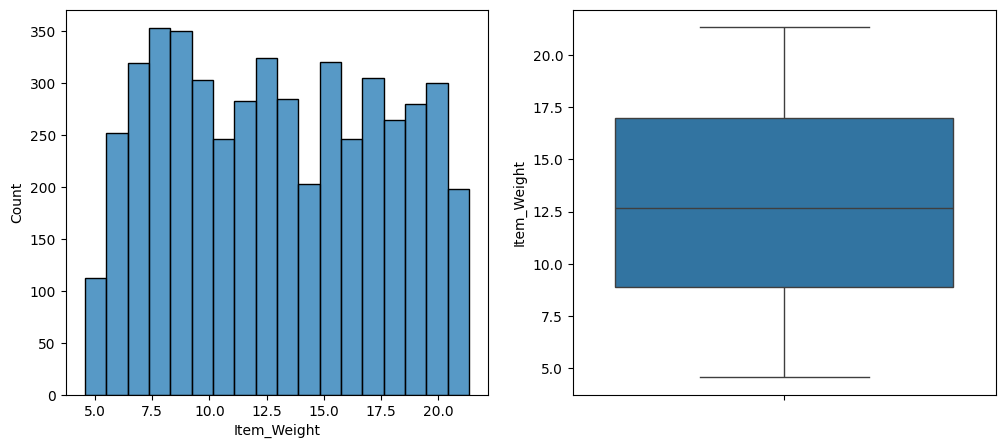

In [216]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(data=X_train_copy, x='Item_Weight', ax=ax[0])
sns.boxplot(data=X_train_copy, y='Item_Weight', ax=ax[1])

In [217]:
def visualize_numeric_feature(data_frame, col_name):
  fig, ax = plt.subplots(1,2, figsize=(12,5))
  sns.histplot(data=data_frame, x=col_name, ax=ax[0])
  sns.boxplot(data=data_frame, y=col_name, ax=ax[1])

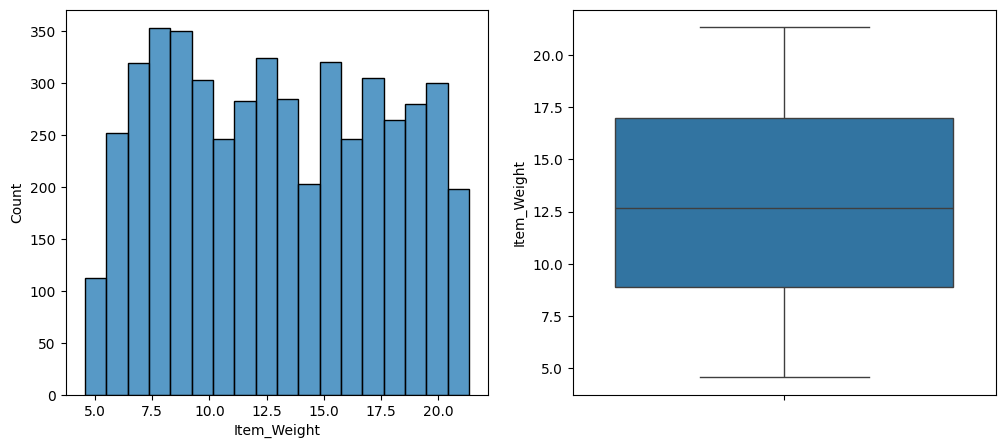

In [218]:
visualize_numeric_feature(X_train_copy,'Item_Weight')

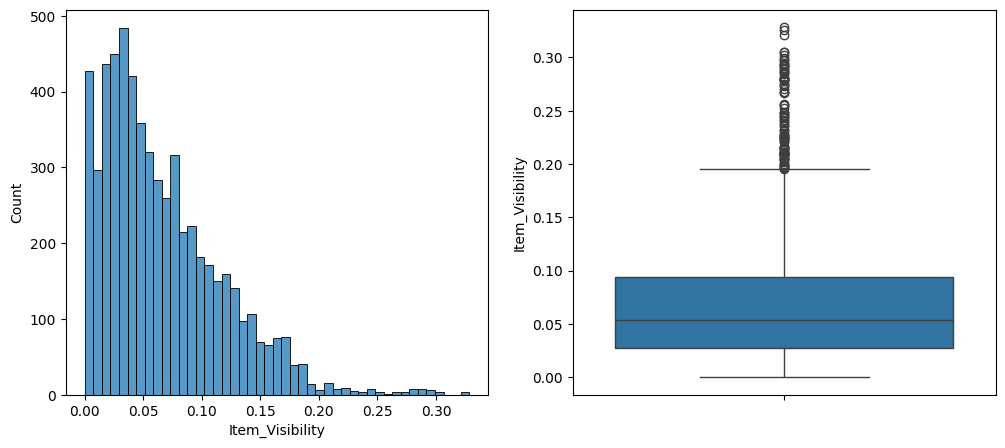

In [219]:
visualize_numeric_feature(X_train_copy, 'Item_Visibility')

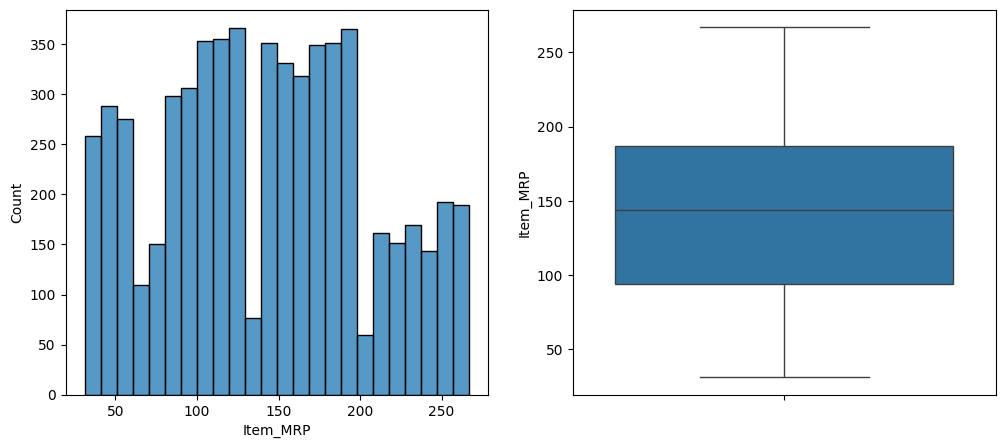

In [220]:
visualize_numeric_feature(X_train_copy, 'Item_MRP')

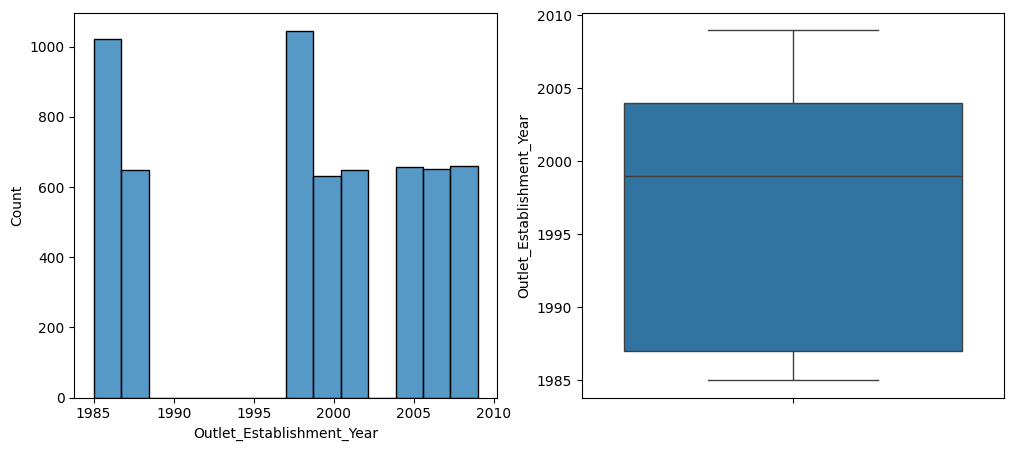

In [221]:
visualize_numeric_feature(X_train_copy, 'Outlet_Establishment_Year')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

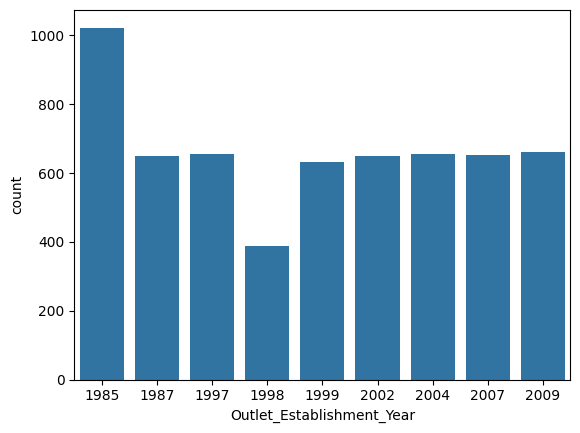

In [222]:
sns.countplot(data=X_train_copy, x='Outlet_Establishment_Year')

In [223]:
cat_features = X_train_copy.select_dtypes(include='object')
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [224]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [225]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [226]:
cat_features['Item_Identifier'].value_counts()

Item_Identifier
NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: count, Length: 1543, dtype: int64

In [227]:
cat_features['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [228]:
cat_features['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: count, dtype: int64

In [229]:
cat_features['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: count, dtype: int64

In [230]:
cat_features['Outlet_Size'].value_counts()

Outlet_Size
Medium    1960
Small     1667
High       649
Name: count, dtype: int64

In [231]:
cat_features['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: count, dtype: int64

In [232]:
cat_features['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: count, dtype: int64

# Data Wrangling and Feature Engineering

Step 1: Create High Level Item types

In [233]:
X_train_copy['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [234]:
#step 1: Map Item ID to Item Types
def create_item_type(data_frame):
  data_frame['Item_Type'] = data_frame['Item_Identifier'].apply(lambda x: x[:2])
  data_frame['Item_Type'] = data_frame['Item_Type'].map({
      'FD':'Food',
      'NC':'Non-Consumable',
      'DR':'Drinks'
  })
  return data_frame


In [235]:
X_train_copy = create_item_type(X_train_copy)
X_train_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non-Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


Step 2: Fill in missing values for Item_Weight

In [236]:
X_train_copy[['Item_Identifier' , 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [237]:
X_train_copy[['Item_Type' , 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
2796,Drinks,5.730
998,Drinks,20.250
670,Drinks,8.395
6091,Drinks,13.500
3438,Drinks,13.850
...,...,...
6624,Non-Consumable,12.600
6191,Non-Consumable,8.880
1911,Non-Consumable,19.850
135,Non-Consumable,7.235


In [238]:
# Step 2: fill in the missing values for Item_weight
# Logic
# 1st step: Use mapping of Item ID - weight anf fill missing values
# 2nd step: If completely new item
# i.e item ID not in test\live data use item type - median(weight) and fill in missing values

ITEM_ID_WEIGHT_PIVOT = X_train_copy.pivot_table(values='Item_Weight', index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [239]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_copy.pivot_table(values='Item_Weight', index='Item_Type',
                                                  aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()

dict_items([('Drinks', 11.8), ('Food', 12.8), ('Non-Consumable', 13.05)])

In [240]:
def impute_item_weight(data_frame):
  # 1st logic item id - weight
  data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
  # 2nd Logic item type - weight if any still missing
  data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))

  return data_frame

In [241]:
X_train_copy = impute_item_weight(X_train_copy)


In [242]:
X_train_copy.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Step 3: Fill in missing values for Outlet_Size


In [243]:
X_train_copy.groupby(by=['Outlet_Type', 'Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [244]:

from scipy.stats import mode
X_train_copy.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else None
).reset_index()

,Outlet_Type,Outlet_Size
0,Grocery Store,Small
1,Supermarket Type1,Small
2,Supermarket Type2,Medium
3,Supermarket Type3,Medium


In [245]:
#step 3: impute missing values of outlet_size
#logic
#1st step: use mapping of Outlet_Type - mode(Outlet_Size) and fill in missing values

from scipy.stats import mode

OUTLET_TYPE_SIZE_PIVOT = X_train_copy.pivot_table(values='Outlet_Size', index='Outlet_Type',
                                                  aggfunc=lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else None).reset_index()
OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
OUTLET_TYPE_SIZE_MAPPING.items()

dict_items([('Grocery Store', 'Small'), ('Supermarket Type1', 'Small'), ('Supermarket Type2', 'Medium'), ('Supermarket Type3', 'Medium')])

In [246]:
def impute_outlet_size(data_frame):
  #ist logic Outlet_Type - mode(Outlet_Size)
  data_frame.loc[:,'Outlet_Size'] = data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))

  return data_frame

In [247]:
X_train_copy = impute_outlet_size(X_train_copy)


In [248]:
X_train_copy.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Step 4: Standardize Item_Fat_Content Categories

In [249]:
X_train_copy['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [250]:
#Step 4: Make Item Fat Content categories consistent

def standardize_item_fat_content(data_frame):
  data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace({
      'Low Fat':'Low_Fat',
      'LF':'Low_Fat',
      'reg':'Regular',
      'low fat':'Low_Fat',

  })
  return data_frame

In [251]:
X_train_copy = standardize_item_fat_content(X_train_copy)
X_train_copy['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat    3860
Regular    2106
Name: count, dtype: int64

Step 5: Correct item fat content for non-consumables

In [252]:
X_train_copy.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drinks          Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non-Consumable  Low_Fat             1137
dtype: int64

In [253]:
X_train_copy.loc[X_train_copy['Item_Type'] == 'Non-Consumable', 'Item_Fat_Content']

655     Low_Fat
4423    Low_Fat
907     Low_Fat
7021    Low_Fat
6074    Low_Fat
         ...   
8322    Low_Fat
466     Low_Fat
6265    Low_Fat
5390    Low_Fat
7270    Low_Fat
Name: Item_Fat_Content, Length: 1137, dtype: object

In [254]:
# Step 5: Correct Item fat content for non-consumables

def correct_item_fat_content(data_frame):
  data_frame.loc[data_frame['Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non_Edible'
  return data_frame

In [255]:
X_train_copy = correct_item_fat_content(X_train_copy)
X_train_copy.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drinks          Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non-Consumable  Non_Edible          1137
dtype: int64

In [256]:
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


# Prepare datasets for ML

In [257]:
def prepare_dataset(data_frame):

  #Step 1: Create Item type
  data_frame = create_item_type(data_frame)

  #Step 2: Fill in missing values for Item_Weight
  data_frame = impute_item_weight(data_frame)

  #Step 3: Fill in missing values for Outlet_Size
  data_frame = impute_outlet_size(data_frame)

  #Step 4: Standardize Item_Fat_Content
  data_frame = standardize_item_fat_content(data_frame)

  #Step 5: Correct item fat content for non-consumables
  data_frame = correct_item_fat_content(data_frame)

  return data_frame

In [258]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [259]:
X_train = prepare_dataset(X_train)
X_test = prepare_dataset(X_test)

In [260]:
X_train.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [261]:
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Handling Categorical Data

EXPT 1: All categorical columns - one hot encoded

In [262]:
cat_features = X_train.select_dtypes(include=['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non-Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [263]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_features)

OneHotEncoder(handle_unknown='ignore')

In [264]:
ohe_feature_names = ohe.get_feature_names_out(cat_features.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [265]:
num_features = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [266]:
cat_features_train = X_train.select_dtypes(include=['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_features_train).toarray(),columns=ohe_feature_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [267]:
X_train_final = pd.concat([num_features, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [268]:
final_columns =  X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [269]:
num_features_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_features_test = X_test.select_dtypes(include=['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_features_test).toarray(),columns=ohe_feature_names)
X_test_final = pd.concat([num_features_test, X_test_cat_ohe], axis=1)
X_test_final= X_test_final[final_columns]
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Modeling

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

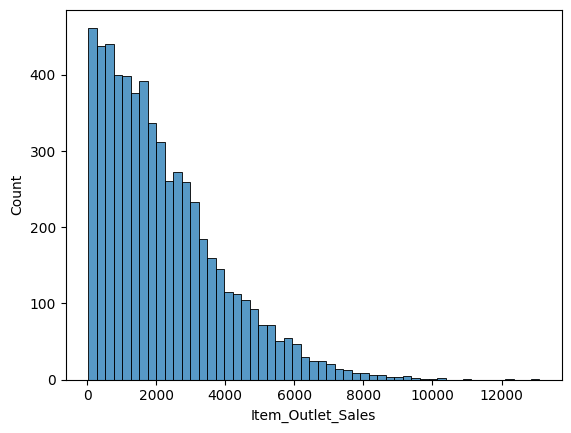

In [270]:
sns.histplot(y_train)

In [271]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np


In [272]:
def train_and_eval_model(model, X_train, y_train, cv=5):
  cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2','neg_root_mean_squared_error'))
  print('Model:', model)
  r2_scores = cv_results['test_r2']
  print('R2 CV scores:',r2_scores)
  print('R2 CV scores mean:', np.mean(r2_scores),'/',np.std(r2_scores))

  rmse_scores = cv_results['test_neg_root_mean_squared_error']
  rmse_scores = [-11*score for score in rmse_scores]
  print('RMSE CV scores:',rmse_scores)
  print('RMSE CV scores mean / stdev:', np.mean(rmse_scores),'/',np.std(rmse_scores))

In [273]:
rf = RandomForestRegressor(n_estimators=100, random_state=SEED)
train_and_eval_model(model=rf,X_train=X_train_final, y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.57060768 0.5268083  0.54281021 0.55421798 0.52017727]
R2 CV scores mean: 0.5429242875459817 / 0.01828158855152387
RMSE CV scores: [12144.732932930174, 12853.288835715623, 12986.659776246215, 12698.767866012275, 13222.920321533116]
RMSE CV scores mean / stdev: 12781.27394648748 / 361.77692551712596


In [274]:
gb= GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.6065274  0.59366925 0.57356358 0.60924345 0.55022613]
R2 CV scores mean: 0.5866459646024772 / 0.022148578096336337
RMSE CV scores: [11625.672351250629, 11910.652399481034, 12542.275746104393, 11889.222104556127, 12802.18453771009]
RMSE CV scores mean / stdev: 12154.001427820454 / 442.5735516174091


In [275]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,X_train=X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV scores mean: 0.5613284973532673 / 0.0205841656268121
RMSE CV scores: [11897.115407508052, 12631.752444118443, 12955.361298921865, 12251.870069594595, 12866.848623750979]
RMSE CV scores mean / stdev: 12520.589568778787 / 395.52728713697365


In [276]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.57730972 0.55914207 0.54421335 0.58393553 0.52431207]
R2 CV scores mean: 0.5577825481764618 / 0.021778582707669483
RMSE CV scores: [12049.581441505718, 12406.378730615785, 12966.716083056373, 12268.1937423979, 13165.823844843404]
R

In [277]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

# Handling Categorical Data

EXPT 2: All categorical columns -  Native Handling

In [278]:
X_train_copy = X_train.copy().drop(columns='Item_Identifier')

cat_cols = X_train_copy.select_dtypes(include=['object']).columns.tolist()
num_cols = cal_cols = X_train_copy.select_dtypes(exclude=['object']).columns.tolist()

cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [279]:
  X_train_copy[cat_cols]= X_train_copy[cat_cols].astype('category')
  n_categorical_features = len(cat_cols)
  n_numerical_features= len(num_cols)
  X_train_copy=X_train_copy[cat_cols+num_cols]

  X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5966 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


In [280]:
categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features
categorical_mask

[True, True, True, True, True, True, False, False, False, False]

In [281]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        make_column_selector(dtype_include='category'),
    ),
    remainder="passthrough"
)
hgb = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
        random_state=42, categorical_features=categorical_mask
    ),
)
train_and_eval_model(model=hgb,X_train=X_train_copy, y_train=y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78fca792b670>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                         

In [282]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_copy, y_train=y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 10
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 10
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

# Handling Categorical Data

Expt 3: No Item Identifier - one hot encoded

In [283]:
X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier']).head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,Non_Edible,Non-Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [284]:
cat_feats = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names= ohe.get_feature_names_out(cat_feats.columns)


In [285]:
num_features_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_features_train = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_features_train).toarray(),columns=ohe_feature_names)
X_train_final = pd.concat([num_features_train, X_train_cat_ohe], axis=1)

X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drinks,Item_Type_Food,Item_Type_Non-Consumable,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [286]:
X_train_final.shape

(5966, 30)

In [287]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.6027587  0.58477918 0.57733175 0.61716814 0.5638745 ]
R2 CV scores mean: 0.5891824563495011 / 0.01880337124010431
RMSE CV scores: [11681.215273213063, 12040.243389226336, 12486.738336788234, 11768.045660261818, 12606.447384474428]
RMSE CV scores mean / stdev: 12116.538008792775 / 372.5139324376326


In [288]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,X_train=X_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV scores mean: 0.5613284973532673 / 0.0205841656268121
RMSE CV scores: [11897.115407508052, 12631.752444118443, 12955.361298921865, 12251.870069594595, 12866.848623750979]
RMSE CV scores mean / stdev: 12520.589568778787 / 395.52728713697365


In [289]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.52348154 0.47860959 0.45772502 0.49196841 0.46576096]
R2 CV scores mean: 0.48350910211416415 / 0.023122182697374725
RMSE CV scores: [12793.833561095213, 13492.027821360814, 14143.568038153882, 13556.44041923951, 13952.588522125521]

In [290]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

# Handling Categorical Data

Expt 4: Item Identifier - featue hashed, rest categorical-one hot encoded


In [291]:
from sklearn.feature_extraction import FeatureHasher

hash_vector_size =  50
fh = FeatureHasher(n_features=hash_vector_size, input_type='string')
hashed_df = pd.DataFrame(fh.transform(X_train['Item_Identifier'].apply(lambda x: [x])).toarray(),
                         columns=['H'+str(i) for i in range(hash_vector_size)])
hashed_df.head()

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [292]:
cat_feats = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names= ohe.get_feature_names_out(input_features=cat_feats.columns)

In [293]:
num_features_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_features_train = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_features_train).toarray(),columns=ohe_feature_names)
X_train_final =  pd.concat([num_features_train, hashed_df, X_train_cat_ohe], axis=1)
X_train_final.head()



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [294]:
X_train_final.shape

(5966, 80)

In [295]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,X_train=X_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60324351 0.58551631 0.57101679 0.61681415 0.54613805]
R2 CV scores mean: 0.5845457617560487 / 0.024698108181039926
RMSE CV scores: [11674.084990894884, 12029.551386089415, 12579.672895902282, 11773.485102005181, 12860.23377384149]
RMSE CV scores mean / stdev: 12183.40562974665 / 461.7873024198217


In [296]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.53676464 0.48594853 0.47719171 0.53119059 0.4537317 ]
R2 CV scores mean: 0.496965433032841 / 0.03205266365570525
RMSE CV scores: [12614.257264861377, 13396.736362912896, 13887.383572951916, 13022.623082667966, 14108.796696091042]
R

In [297]:
X_test.shape

(2557, 11)

In [308]:
hashed_test_df = pd.DataFrame(fh.transform(X_test['Item_Identifier'].apply(lambda x: [x])).toarray(),
                         columns=['H'+str(i) for i in range(hash_vector_size)])
num_features_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_features_test = X_test.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_features_test).toarray(),columns=ohe_feature_names)
X_test_final =  pd.concat([num_features_test, hashed_test_df, X_test_cat_ohe], axis=1)
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,-1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [309]:
X_test_final.shape

(2557, 80)

In [310]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
xgr.fit(X_train_final, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [311]:
y_pred = xgr.predict(X_test_final)

In [312]:
from sklearn.metrics import r2_score, mean_squared_error


In [313]:
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE Score:', mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.542336999238969
RMSE Score: 1132.2151309907754


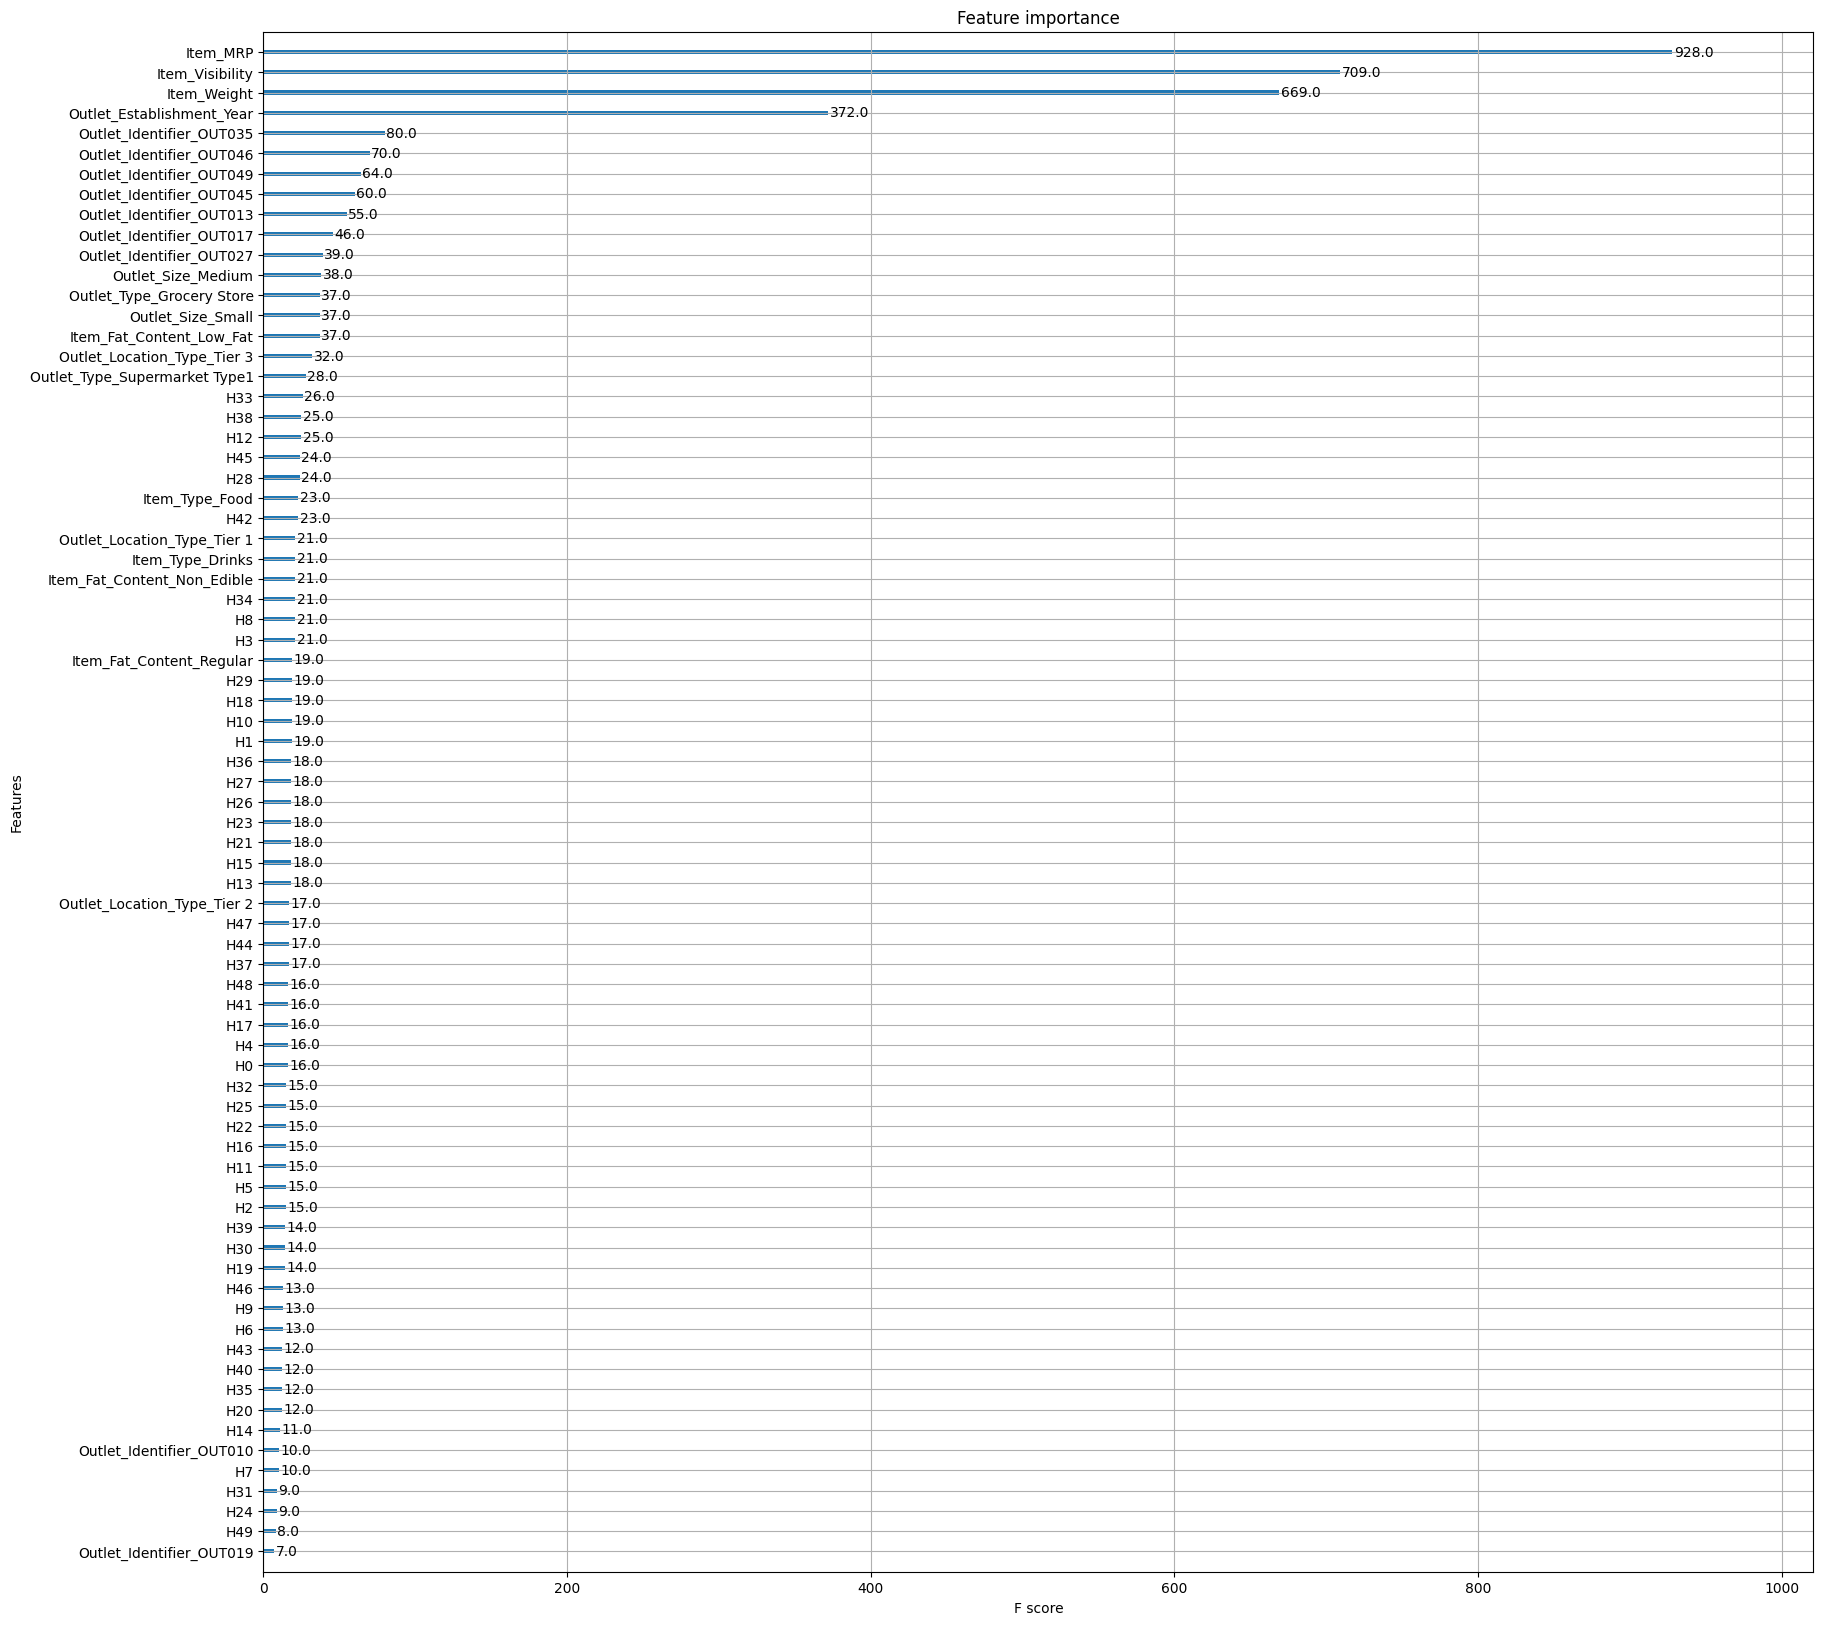

In [316]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(20,20))
plot_importance(xgr, ax=ax);